In [4]:
from glob import glob

len(glob("../DATASETS/idd20k_final/train/labels/*")),len(glob("../DATASETS/idd20k_final/valid/labels/*"))
# !ls ../DATASETS/Cityspaces/images/train/*/*

(5966, 1016)

In [5]:
!rm -r Dataset/IDD

In [6]:
!mkdir Dataset/IDD
!mkdir Dataset/IDD/images
!mkdir Dataset/IDD/masks_org
!mkdir Dataset/IDD/masks

!mkdir Dataset/IDD/Test
!mkdir Dataset/IDD/Test/images
!mkdir Dataset/IDD/Test/masks_org
!mkdir Dataset/IDD/Test/masks

!cp ../DATASETS/idd20k_final/train/images/*  Dataset/IDD/images/
!cp ../DATASETS/idd20k_final/train/labels/*  Dataset/IDD/masks_org/

!cp ../DATASETS/idd20k_final/valid/images/*  Dataset/IDD/Test/images/
!cp ../DATASETS/idd20k_final/valid/labels/*  Dataset/IDD/Test/masks_org/

In [7]:
i = !ls Dataset/IDD/images/
l = !ls Dataset/IDD/masks_org/

test_i = !ls Dataset/IDD/Test/images/
test_l = !ls Dataset/IDD/Test/masks_org/
len(i), len(l),len(test_i), len(test_l)

(5966, 5966, 1016, 1016)

In [8]:
l[-5:], i[-5:]

(['frame9980.jpg',
  'frame9982.jpg',
  'frame9991.jpg',
  'frame9994.jpg',
  'frame99992.jpg'],
 ['frame9980.jpg',
  'frame9982.jpg',
  'frame9991.jpg',
  'frame9994.jpg',
  'frame99992.jpg'])

Dataset/IDD/masks_org/frame14067.jpg
(1080, 1920)
[ 0  1  2  4  5  6  8  9 11 12 13 17 20 21 22 24 25]


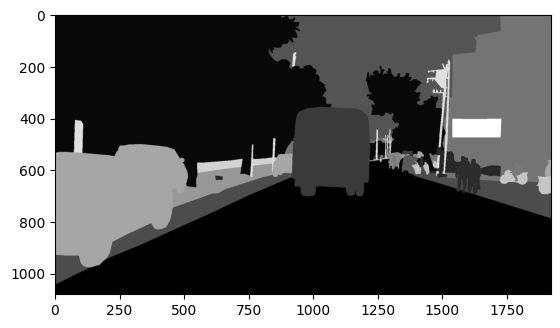

In [9]:
import cv2
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

l = glob('Dataset/IDD/masks_org/*')
print(l[9])
m = cv2.imread(l[9],0)
print(m.shape)
print(np.unique(m))
plt.imshow(m*75,cmap="gray")
plt.show()

In [11]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [12]:
from tqdm import tqdm

def mask_mapping(path=''):
    for i, filepath in tqdm(enumerate(glob(path))):
        img = cv2.imread(filepath,0)    
        
# 100 = background 
# 101 = road        
# 102 = obstacle   

        for j in [2,3,13,14,15,16,17,18,19,20,21,22,23,24,25,255]:
            img = np.where(img == j , 100, img)            
            
        for j in [4,5,6,7,8,9,10,11,12]:
            img = np.where(img == j , 102, img)

        for j in [0,1]:
            img = np.where(img == j , 101, img)
        
        img = img%100  
        splits_ = filepath.rsplit("/",2)
        filepath_ = splits_[0]+"/masks/"+ f"{splits_[2].split('.')[0]}.png"
        cv2.imwrite(filepath_, img)      
        lst= np.unique(img)
        if i<1 or not all(ii < 3 for ii in lst):
            print(np.unique(img))
            print(filepath_)

mask_mapping(path='Dataset/IDD/masks_org/*')
mask_mapping(path='Dataset/IDD/Test/masks_org/*')

2it [00:00,  7.40it/s]

[0 1 2]
Dataset/IDD/masks/frame11755.png
[0 1 2]
Dataset/IDD/masks/frame4442.png


4it [00:00,  7.63it/s]

[0 1 2]
Dataset/IDD/masks/frame3813.png
[0 1 2]
Dataset/IDD/masks/frame44804.png


6it [00:00,  8.32it/s]

[0 1 2]
Dataset/IDD/masks/frame32444.png


5966it [10:11,  9.76it/s]
2it [00:00,  7.57it/s]

[0 1 2]
Dataset/IDD/Test/masks/frame0874.png
[0 1 2]
Dataset/IDD/Test/masks/frame46571.png


4it [00:00,  7.61it/s]

[0 1 2]
Dataset/IDD/Test/masks/frame3263.png
[0 1 2]
Dataset/IDD/Test/masks/0022565.png


6it [00:00,  8.22it/s]

[0 1 2]
Dataset/IDD/Test/masks/0018459.png


1016it [01:43,  9.79it/s]


In [17]:
len(os.listdir('Dataset/IDD/images/')), len(os.listdir('Dataset/IDD/Test/images/'))

(5966, 1016)

In [18]:
len(os.listdir('Dataset/IDD/masks/')), len(os.listdir('Dataset/IDD/Test/masks/'))

(5966, 1016)

[0. 1. 2.]


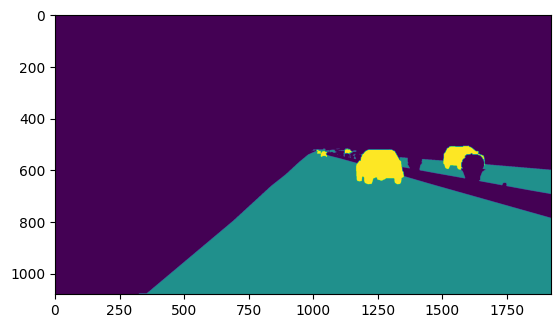

[0. 1. 2.]


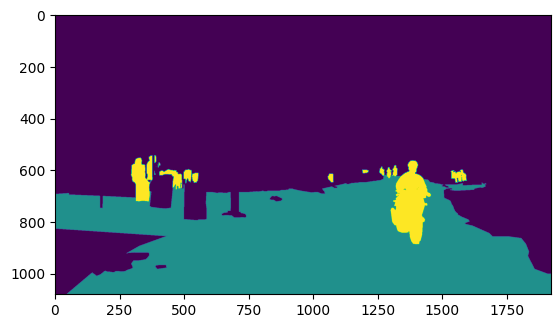

In [19]:
import matplotlib.pyplot as plt
import numpy as np
for i in glob('Dataset/IDD/masks/*')[:2]:
    t = cv2.imread(i,0)
    t = t.astype(np.float32)
    print(np.unique(t))
    plt.imshow(t)
    plt.show()

[0. 1. 2.]


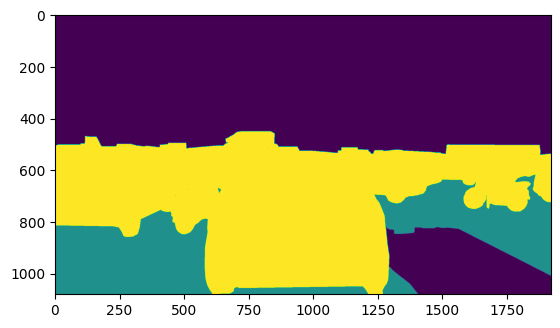

[0. 1. 2.]


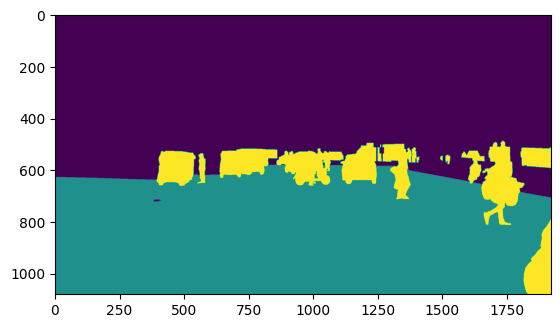

In [20]:
for i in glob('Dataset/IDD/Test/masks/*')[:2]:
    t = cv2.imread(i,0)
    t = t.astype(np.float32)
    print(np.unique(t))
    plt.imshow(t)
    plt.show()